<a href="https://colab.research.google.com/github/sarmi2325/Neural_Network/blob/main/07_RNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
#creating input and output to be
input=[0,1,1,0,2,3]

X=np.array(input[:-1]).reshape(-1,1)
y=np.array(input[1:]).reshape(-1,1)


In [70]:
#initialize parameters
input_size=1
hidden_size=4
output_size=1
voc_length=len(X)

#initializing the weights and bias
wx = np.random.randn(input_size,hidden_size)*0.01
wh = np.random.randn(hidden_size,hidden_size)*0.01
wy = np.random.randn(hidden_size,output_size)*0.01

bh = np.zeros((1,hidden_size))
by = np.zeros((1,output_size))


In [71]:
#defining function for forward pass
def forward(X,wx,wh,wy,bh,by):
  prev_h = np.zeros((1,wh.shape[0]))  #initialize the previous state
  hs=[]  #to store the hidden states at each time step
  ys=[]  #to store the predictions

  for t in range(len(X)):
    x_t = X[t].reshape(1,-1)

    h_t=np.tanh(x_t @ wx + prev_h @ wh + bh)
    y_t=h_t @ wy +by

    hs.append(h_t)
    ys.append(y_t)

    prev_h=h_t

  return  hs,ys

In [72]:
# define loss function
def loss(ys,y):
  loss = 0
  for y_pred,y_true in zip(ys,y):
    loss+= np.mean((y_pred-y_true.reshape(-1,1))**2)
  return loss/len(y)

In [73]:
#initialize hyperparameter
lr=0.01
epoch=13000

for e in range(epoch):
  hs,ys = forward(X,wx,wh,wy,bh,by)
  compute_loss = loss(ys,y)

  #initialize gradient weights and bias
  dwx=np.zeros_like(wx)
  dwh=np.zeros_like(wh)
  dwy=np.zeros_like(wy)
  dbh=np.zeros_like(bh)
  dby=np.zeros_like(by)

  dh_next=np.zeros((1,hidden_size))

  #backpropogation
  for t in reversed(range(len(X))):
  # loss w.r.t. to output
    dy = ys[t]-y[t].reshape(1,-1)

    dwy+= hs[t].T @ dy
    dby+=dy

    dh = dy @ wy.T +dh_next

    dh_raw = (1-hs[t]**2) * dh

    x_t = X[t].reshape(1,-1)
    h_prev = hs[t-1] if t>0 else np.zeros_like(hs[0])

    dwx += x_t @ dh_raw
    dwh += h_prev.T @ dh_raw
    dbh += dh_raw

    dh_next = dh_raw

  # updating weights and bias
  wx -= lr * dwx
  wh -= lr * dwh
  wy -= lr * dwy
  bh -= lr * dbh
  by -= lr * dby


  if e % 1000 == 0:
        print(f"Epoch {e}, Loss: {compute_loss:.4f}")





Epoch 0, Loss: 3.0010
Epoch 1000, Loss: 0.3078
Epoch 2000, Loss: 0.2938
Epoch 3000, Loss: 0.6238
Epoch 4000, Loss: 0.7701
Epoch 5000, Loss: 0.2469
Epoch 6000, Loss: 0.2615
Epoch 7000, Loss: 0.1862
Epoch 8000, Loss: 0.1005
Epoch 9000, Loss: 0.0933
Epoch 10000, Loss: 0.0711
Epoch 11000, Loss: 0.0460
Epoch 12000, Loss: 0.0182


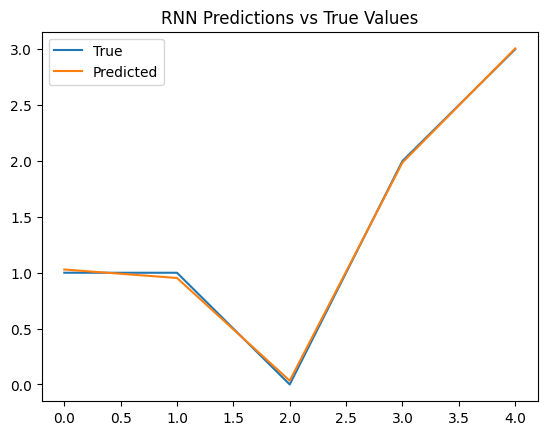

In [74]:
import matplotlib.pyplot as plt

y_preds = [y[0][0] for y in ys]  # flatten predictions
y_true = [val[0] for val in y]  # flatten ground truth

plt.plot(y_true, label='True')
plt.plot(y_preds, label='Predicted')
plt.legend()
plt.title("RNN Predictions vs True Values")
plt.show()
